# Code

EV aggregator implementation based on State Space Model.

### EV SSM Class

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ev_ssm import ev_ssm
from ev_ssm import r_agc_sev

In [2]:
t0 = 10
sse = ev_ssm(ts=t0, N=10000, step=1, tp=40,
             lr=0.1, lp=40, seed=2022, name="EVA")
sse.load_A("Aest.csv")

t_total = 100

ev_soc = pd.DataFrame(columns=range(t_total))
ev_agc = pd.DataFrame(columns=range(t_total))

for end_time in range(100):
    sse.run(tf=t0+end_time/3600, Pi=0,
            is_updateA=False, is_rstate=True,
            is_test=False, disable=True)
    ev_soc[end_time] = sse.ev.soc
    ev_agc[end_time] = sse.ev.agc

EVA: ts=10[H], 10000 EVs, Total Q=250.12 MWh
Online 1983, Q=49.73 MWh, SoC=0.9834
Power(MW): Pt=-0.3613, Pc=-0.3613, Pd=-0.0
Ctrl: 0=1921; 1=62; 
EVA: Load A from Aest.csv.
EVA: end time 10.0[H] is too close to start time 10[H],simulation will not start.


In [13]:
ev_agc[ev_agc.abs().sum(axis=1) == 1]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99


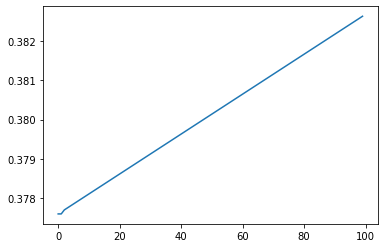

In [9]:
plt.plot(range(100), evsoc.iloc[9630], label="soc")  # fina a ev that particiapted AGC

In [ ]:
t0 = 10.4
sse = ev_ssm(ts=t0, N=10000, step=1, tp=1,
             lr=0.1, lp=40, seed=2022, name="EVA")
sse.load_A("Aest.csv")

In [ ]:
Piup = [0, -0.01, 0.5, -0.01, 0.5, -0.01, 0.5]

Pi_input = Piup
tf = list(2*np.array(range(1, len(Pi_input)+1)))
tf.append(tf[-1]+10)

for t, p in zip(tf, Pi_input):
    sse.run(tf=t0+t/3600, Pi=p,
            is_updateA=False, is_rstate=True,
            is_test=False, disable=True)
#     sse.report()


In [ ]:
fige, axe = plt.subplots(1, 2, figsize=(10, 3))
axe[0].plot(3600*(np.array(sse.tss)-10), sse.Prl, color='tab:blue', marker='*', label='Signal')
axe[0].plot(3600*(np.array(sse.tss)-10), sse.Prcl, color='tab:orange', marker='*', label='Response')
axe[1].plot(3600*(np.array(sse.tss)-10), sse.Ptl, color='tab:blue', marker='*', label='Actual')
axe[1].plot(3600*(np.array(sse.tss)-10), sse.yl, color='tab:orange', marker='*', label='Estimate')
axe[0].legend()
axe[1].legend()

The calculation of Prc is not correct.

In [ ]:
plt.plot(3600*(np.array(sse.tss)-10), sse.Prl, color='tab:blue', marker='*', label='Signal')

### BUG

1. To response a large AGC, all the EVs should be switched to DS, but now some remains IS.
2. The logic of action may need improvement?

In [ ]:
sse = ev_ssm(ts=10, N=10000, step=1, tp=100,
             lr=0.1, lp=100, seed=2022, name="EVA")
sse.load_A("Aests.csv")

u, v, us, vs = sse.r_agc(Pi=5)
u, v, us, vs = sse.r_agc(Pi=23)
print(sse.Pr)
sse.xtab

In [ ]:
sse = ev_ssm(ts=10, N=10000, step=1, tp=100,
             lr=0.1, lp=100, seed=2022, name="EVA")
sse.load_A("Aests.csv")
u, v, us, vs = sse.r_agc(Pi=23)
print(sse.Pr)
sse.xtab

### Test AGC Response

In [ ]:
sse = ev_ssm(ts=10, N=10000, step=1, tp=100,
             lr=0.1, lp=100, seed=2022, name="EVA")
sse.load_A("Aests.csv")

Pi=0
for tf in np.arange(10, 10.1, 1/3600):
    sse.run(tf=tf, Pi=Pi, is_update=True, is_record=True, is_test=False)

In [ ]:
sse.plot()

In [ ]:
sse = ev_ssm(ts=10, N=10000, step=1, tp=100,
             lr=0.1, lp=100, seed=2022, name="EVA")
sse.load_A("Aests.csv")

Pi=0
for tf in np.arange(10, 10.01, 1/3600):
    sse.run(tf=tf, Pi=Pi, is_update=True, is_record=True, is_test=False)

Pi = 0.1
for tf in np.arange(10.01, 10.02, 1/3600):
    sse.run(tf=tf, Pi=Pi, is_update=True, is_record=True, is_test=False)

Pi = 0.05
for tf in np.arange(10.02, 10.03, 1/3600):
    sse.run(tf=tf, Pi=Pi, is_update=True, is_record=True, is_test=False)

Pi = 0.15
for tf in np.arange(10.03, 10.05, 1/3600):
    sse.run(tf=tf, Pi=Pi, is_update=True, is_record=True, is_test=False)

In [ ]:
sse.plot()

## Misc

In [ ]:
u, v, us, vs = sse.r_agc(Pi=5)
print(sse.Pr)
print(us)
print(vs)
sse.xtab

In [ ]:
cdf = pd.DataFrame(np.concatenate([u.reshape(1, 20), v.reshape(1, 20)], axis=0),
                   columns=sse.rtab.columns)

### SAC

This coeef. does not make sense?

In [ ]:
socb = np.arange(0, 1.01, 0.05)
for i in range(len(socb)-1):
    print('soc=', i, 'k=', pow(1-sse.sac(0.5*(socb[i]+socb[i+1]))[2], 20/3600/sse.Th))

In [ ]:
x = np.linspace(0, 1, 100)
sac = sse.sac(x)

plt.style.use('default')
with plt.style.context(['ieee']):
    fig, ax = plt.subplots(1, 1, figsize=(10, 3))
    ax.plot(np.arange(0, 1, 0.01), sac[0], label='CS')
    ax.plot(np.arange(0, 1, 0.01), sac[1], label='IS')
    ax.plot(np.arange(0, 1, 0.01), sac[2], label='DS')
    ax.legend()
    ax.set_ylim([0, 1.01])
    ax.set_xlim([0, 1])
    ax.set_xlabel('SoC [%]')
    ax.set_ylabel('SoC Adapt. Coeff.')

### test

In [ ]:
# sse = ev_ssm(ts=10, N=10000, step=1, tp=100,
#              lr=0.1, lp=100, seed=2022, name="SSE1")

# # --- build and save A matrix ---
# sse.test(tf=10.1)
# sse.save_A("Aests.csv")

# --- load A matrix ---
# sse.load_A("Aests.csv")

# --- run MCS ---
# sse.run(tf=10.1, is_update=True, is_record=True)

# --- plot results ---
# fig, ax = sse.plot()

# --- test A matrix stability ---
# sse.g_res(x0=sse.x0.copy(), n=1000)
# print(np.sum(sse.x0))

# sse.reset(tnow=10, clean_xl=False)

# --- continually run ---
# for tf in np.arange(10, 10.1, 4/3600):
#     sse.run(tf=tf, is_update=True, is_record=True, is_test=False)

# --- spy A ---
# with plt.style.context(['ieee']):
#     fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=100)
#     ax.spy(sse.A, markersize=4, marker='o',
#            markerfacecolor='orange', markeredgecolor='orange')
#     ax.grid(which='major', alpha=1)
#     ax.grid(which='minor', alpha=1)
#     ax.set_xlim(0, 3*sse.Ns-1)
#     ax.set_ylim(3*sse.Ns-1, 0)
#     ax.set_title("Spy of mat $A$")
#     ax.minorticks_on()

#     ax.set_xlabel('$\mathbf{x}(k)$')
#     ax.xaxis.set_label_position('top')
#     ax.set_ylabel('$\mathbf{x}(k+1)$')

### EV online numbers

In [ ]:
sse = ev_ssm(ts=9.999999, N=10000, step=100, tp=100,
             lr=0.1, lp=100, seed=2022, name="EVA")
socn1 = [sse.wsoc]
soct1 = [sse.ts]
for t in np.arange(10, 11.2, 0.1):
    sse.run(tf=t, is_record=False, is_update=False, is_test=False, Pi=0, disable=True)
    sse.report(is_report=False)
    socn1.append(sse.wsoc)
    soct1.append(sse.ts)

sse = ev_ssm(ts=17.999999, N=10000, step=100, tp=100,
         lr=0.1, lp=100, seed=2022, name="EVA")
socn2 = [sse.wsoc]
soct2 = [sse.ts]
for t in np.arange(18, 19.2, 0.1):
    sse.run(tf=t, is_record=False, is_update=False, is_test=False, Pi=0, disable=True)
    sse.report(is_report=False)
    socn2.append(sse.wsoc)
    soct2.append(sse.ts)

In [ ]:
%matplotlib inline
with plt.style.context(['ieee']):
    fig_soc, ax_soc = plt.subplots(figsize=(3, 2))
    ax_soc.plot(3600*(np.array(soct1)-10), 100*np.array(socn1), label='10H')
    ax_soc.plot(3600*(np.array(soct2)-18), 100*np.array(socn2), label='18H')
    ax_soc.grid()
    ax_soc.set_xlim([0, 3600])
    ax_soc.set_xticks(range(0, 3700, 600), range(0, 61, 10))
    ax_soc.set_xlabel('Time [min]')
    ax_soc.set_ylabel('SOC [%]')
    ax_soc.legend()

In [ ]:
fig_soc.savefig('fig_evsoc.eps', format='eps', bbox_inches='tight')

In [ ]:
sse = ev_ssm(ts=0, N=10000, step=1, tp=100,
             lr=0.1, lp=100, seed=2022, name="EVA")
evn = [sse.ev.u.sum()]
for t in np.arange(0.0001, 24, 60/3600):
    sse.ts = sse.g_ts(t)
    sse.g_u()
    evn.append(sse.ev.u.sum())

In [ ]:
%matplotlib inline
with plt.style.context(['ieee']):
    fig_evn, ax_evn = plt.subplots(figsize=(4, 3))
    ax_evn.plot(sse.tss, evn)
    ax_evn.grid()
    ax_evn.set_xlim([0, 24])
    ax_evn.set_xticks(range(0, 25, 4), range(0, 25, 4))
    ax_evn.set_ylim(bottom=0)
    ax_evn.set_xlabel('Time [H]')
    ax_evn.set_ylabel('Number of online EVs')

### Spy An

In [ ]:
# Long enough, all the EVs will become idle.

An = np.linalg.matrix_power(sse.A, 225)

# --- spy A ---
with plt.style.context(['ieee']):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=100)
    ax.spy(An, markersize=4, marker='o',
           markerfacecolor='orange', markeredgecolor='orange')
    ax.grid(which='major', alpha=1)
    ax.grid(which='minor', alpha=1)
    ax.set_xlim(0, 3*sse.Ns-1)
    ax.set_ylim(3*sse.Ns-1, 0)
    ax.set_title("Spy of mat $A$")
    ax.minorticks_on()

    ax.set_xlabel('$\mathbf{x}(k)$')
    ax.xaxis.set_label_position('top')
    ax.set_ylabel('$\mathbf{x}(k+1)$')

In [ ]:
# control vector validation

cl = -1*sse.rtab.iloc[1].values - sse.rtab.iloc[2].values
cu = sse.rtab.iloc[0].values + sse.rtab.iloc[1].values

u = np.zeros((20,))
v = np.zeros((20,))

# max output
u = sse.rtab.iloc[0].values
v = sse.rtab.iloc[1].values + sse.rtab.iloc[0].values

# min output
u = -1 * sse.rtab.iloc[1].values - sse.rtab.iloc[2].values
v = -1 * sse.rtab.iloc[2].values

res = sse.x0 + np.matmul(sse.B, u).reshape(-1) + np.matmul(sse.C, v).reshape(-1)

print("res check:", np.all(res >= 0))

with plt.style.context(['ieee']):
    width = 0.35
    x = np.arange(len(sse.x0))
    fig, ax = plt.subplots(1, 1, figsize=(12, 5))
    ax.bar(x - 0.5*width, sse.x0, width, label="in", color='cyan')
    ax.bar(x + 0.5*width, res, width, label="out", color='orange')
    ax.set_xlim(0, 59)
    ax.set_ylim(-0.0, 0.01)
    ax.legend(['x0', 'x0+ctrl'])